## **SVM with SIFT features:**


**Part 1: Extracting SIFT Features:**

- **Purpose:** Identify salient image regions (keypoints) and encode their unique characteristics (descriptors).
- **Steps:**
  1. **Keypoint detection:** SIFT identifies stable keypoints, like corners and junctions, that are robust to changes in viewpoint, illumination, and scale.
  2. **Descriptor generation:** For each keypoint, SIFT creates a 128-dimensional descriptor capturing local gradient information, providing a distinctive "fingerprint" for that keypoint.
- **Benefits:**
  - SIFT descriptors are highly distinctive and invariant to image transformations, making them suitable for image classification tasks.
  - Keypoints focus on informative regions, reducing complexity and noise compared to processing the entire image.

**Part 2: Creating a Codebook (Bag of Words):**

- **Purpose:** Represent images as a collection of "visual words" from a visual vocabulary.
- **Steps:**
  1. **Clustering:** K-means clustering groups similar SIFT descriptors (from all images) into k clusters, each representing a "visual word" in the codebook.
  2. **Word assignment:** Each SIFT descriptor is assigned to its closest cluster center, giving it a "word" index.
- **Benefits:**
  - Reduces the dimensionality of data from individual descriptors to words, simplifying training and improving efficiency.
  - Provides a common vocabulary for representing different images, enabling comparison and classification based on word occurrences.

**Part 3: Generating Image Representations:**

- **Purpose:** Convert the assigned "words" for each image into a feature vector suitable for SVM training.
- **Steps:**
  1. **Histogram creation:** Count the occurrences of each visual word in the image, forming a histogram of word frequencies.
  2. **Normalization:** Normalize the histogram to compensate for image size variations and ensure equal weighting of words.
- **Benefits:**
  - Transforms the word-based image representation into a fixed-length feature vector compatible with SVM input.
  - Normalization avoids bias towards larger images and ensures fair comparison across training data.

**Part 4: Training the SVM:**

- **Purpose:** Learn a classification model that maps image features (histograms) to their corresponding classes.
- **Steps:**
  1. **SVM setup:** Choose an SVM algorithm (e.g., linear, RBF) and set hyperparameters like regularization strength.
  2. **Training data:** Provide the SVM with the normalized image histograms as features and their corresponding class labels.
  3. **Model learning:** The SVM optimizes its internal parameters to best separate different classes based on the feature data.
- **Benefits:**
  - SVM learns a decision boundary to accurately classify new images based on their features.
  - Hyperparameter tuning helps optimize the SVM's performance for your specific dataset.

**Part 5: Prediction:**

- **Purpose:** Apply the trained SVM to classify new images.
- **Steps:**
  1. **Feature extraction:** Extract SIFT features and assign "words" from the codebook for the new image.
  2. **Histogram generation:** Create a normalized histogram of word occurrences for the new image.
  3. **SVM prediction:** Feed the new image's histogram into the trained SVM to predict its class.
- **Benefits:**
  - Classifies new images based on their learned relationship with previously trained data.
  - Enables real-time application of the trained model for tasks like image recognition or scene understanding.


## Setup


### Import


In [3]:
# %matplotlib ipympl

import numpy as np
import matplotlib.pyplot as plt
from src.helpers import *

from sklearn.cluster import KMeans
from sklearn.svm import SVC

from IPython.display import clear_output as clear

from src.image import images as all_images

# 3.6s

### Load


In [14]:
writers = sorted(list(set([image.writer for image in all_images])))
writers = writers[:5]  # SET TO 5 WRITERS FOR TESTING


train_images = [
    image for image in all_images if int(image.version) != 3 and image.writer in writers
]


test_images = [
    image for image in all_images if int(image.version) == 3 and image.writer in writers
]

### SIFT


In [15]:
# Doing internally at descriptors and keypoints property
all_descriptors = []
for i, image in enumerate(train_images):
    clear(wait=True)
    print(f"{i+1}/{len(train_images)}")
    all_descriptors.append(image.descriptors)

# 13m38.1s

10/10


In [16]:
all_descriptors[0].shape

(15303, 128)

### Clustering


In [17]:
vocab_size = int(25)
kmeans = KMeans(n_clusters=vocab_size, n_init=10)
vocab = kmeans.fit(np.concatenate(all_descriptors))
alert()

# 493m 58.4s

### Histograms


In [18]:
image_hists = []
for i in range(len(train_images)):
    hist, _ = np.histogram(kmeans.predict(all_descriptors[i]), bins=vocab_size)
    image_hists.append(hist)

# 41.4s

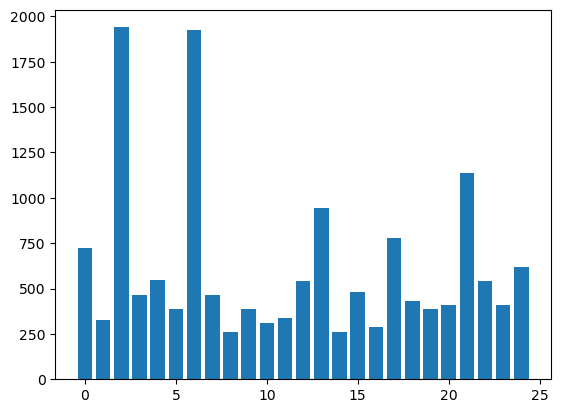

In [19]:
for i, hist in enumerate(image_hists[0:1]):
    plt.figure()
    plt.bar(range(len(hist)), hist)
    # plt.xlabel("Visual Word Index")
    # plt.ylabel("Frequency")
    # plt.title(f"Histogram for Image {train_images[i].path}")
    # plt.xlabel("")
    # plt.ylabel("Frequency")
    # plt.title(f"Histogram for Image {train_images[i].path}")
    # plt.axis('off')
    plt.show()

# 0.6s

## Multi-class


### Train SVM classifier


In [8]:
clf = SVC(kernel="linear")  # Ajust kernel if needded
clf.fit(image_hists, [image.writer for image in train_images])

# 0.2s

SVC(kernel='linear')

### Classify new Image


In [9]:
success = 0
for i, image in enumerate(test_images):
    hist, _ = np.histogram(kmeans.predict(image.descriptors), bins=vocab_size)
    prediction = clf.predict([hist])[0]
    if prediction == image.writer:
        success += 1
    print(
        f"Image {image.path} - Predicted:{prediction} - Actual:{image.writer} - Correct: {prediction == image.writer}"
    )

print(f"Accuracy: {success/len(test_images)*100}%")

# 6m 56.2s

Image CF00001_03.bmp - Predicted:CF00001 - Actual:CF00001 - Correct: True
Image CF00002_03.bmp - Predicted:CF00002 - Actual:CF00002 - Correct: True
Image CF00003_03.bmp - Predicted:CF00003 - Actual:CF00003 - Correct: True
Image CF00004_03.bmp - Predicted:CF00004 - Actual:CF00004 - Correct: True
Image CF00005_03.bmp - Predicted:CF00005 - Actual:CF00005 - Correct: True
Image CF00006_03.bmp - Predicted:CF00006 - Actual:CF00006 - Correct: True
Image CF00007_03.bmp - Predicted:CF00007 - Actual:CF00007 - Correct: True
Image CF00008_03.bmp - Predicted:CF00008 - Actual:CF00008 - Correct: True
Image CF00009_03.bmp - Predicted:CF00009 - Actual:CF00009 - Correct: True
Image CF00010_03.bmp - Predicted:CF00010 - Actual:CF00010 - Correct: True
Image CF00011_03.bmp - Predicted:CF00011 - Actual:CF00011 - Correct: True
Image CF00012_03.bmp - Predicted:CF00012 - Actual:CF00012 - Correct: True
Image CF00013_03.bmp - Predicted:CF00013 - Actual:CF00013 - Correct: True
Image CF00014_03.bmp - Predicted:CF000